**Review**

Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job! The project is accepted. Keep up the good work on the next sprint!

Introduction: I work for the OilyGiant mining company. My task is to find the best place for a new well.

Steps to choose the location:
- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

I have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the Bootstrapping technique.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
df0 = pd.read_csv("/datasets/geo_data_0.csv")
df1 = pd.read_csv("/datasets/geo_data_1.csv")
df2 = pd.read_csv("/datasets/geo_data_2.csv")

In [3]:
#check for NaNs
df0.isna().any()

id         False
f0         False
f1         False
f2         False
product    False
dtype: bool

In [4]:
df1.isna().any()

id         False
f0         False
f1         False
f2         False
product    False
dtype: bool

In [5]:
df2.isna().any()

id         False
f0         False
f1         False
f2         False
product    False
dtype: bool

In [6]:
#check for duplicates
df0.duplicated().any()

False

In [7]:
df1.duplicated().any()

False

In [8]:
df2.duplicated().any()

False

In [9]:
df0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was loaded and inspected!

</div>

In [10]:
def data_split(data):
    # Split the data into training and validation sets (75:25 ratio)
    features = data.drop(columns=['id', 'product'])
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=12345)
    print(features_train.shape, features_valid.shape, target_train.shape, target_valid.shape)
    return features_train, features_valid, target_train, target_valid

In [11]:
features_train0, features_valid0, target_train0, target_valid0 = data_split(df0)

(75000, 3) (25000, 3) (75000,) (25000,)


In [12]:
features_train1, features_valid1, target_train1, target_valid1 = data_split(df1)

(75000, 3) (25000, 3) (75000,) (25000,)


In [13]:
features_train2, features_valid2, target_train2, target_valid2 = data_split(df2)

(75000, 3) (25000, 3) (75000,) (25000,)


<div class="alert alert-success">
<b>Reviewer's comment</b>

The data was split into train and validation sets

</div>

In [14]:
def linear_regression_model(features_train, features_valid, target_train, target_valid):
    model = LinearRegression()
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make Predictions
    target_predicted = model.predict(features_valid)
    
    # Calculate the rsme
    rmse = np.sqrt(mean_squared_error(target_valid, target_predicted))
    
    # Calculate the average volume of predicted reserves
    avg_predicted_reserve = target_predicted.mean()
    
    # Print results
    print(f'RMSE: {rmse}')
    print(f'Average Predicted Reserves: {avg_predicted_reserve}')
    
    return target_predicted

In [15]:
print('Region 0')
target_predicted0 = linear_regression_model(features_train0, features_valid0, target_train0, target_valid0)

Region 0
RMSE: 37.5794217150813
Average Predicted Reserves: 92.59256778438035


In [16]:
print('Region 1')
target_predicted1 = linear_regression_model(features_train1, features_valid1, target_train1, target_valid1)

Region 1
RMSE: 0.893099286775617
Average Predicted Reserves: 68.728546895446


In [17]:
print('Region 2')
target_predicted2 = linear_regression_model(features_train2, features_valid2, target_train2, target_valid2)

Region 2
RMSE: 40.02970873393434
Average Predicted Reserves: 94.96504596800489


These results provide information about the accuracy of the linear regression models for each region in predicting the reserves. Lower RMSE values indicate better model performance, and the average predicted reserves give an estimate of the expected reserves in each region based on the model's predictions. Region 1 stands out with a very low RMSE, suggesting better predictive accuracy compared to the other regions.

<div class="alert alert-success">
<b>Reviewer's comment</b>

The models were trained and evaluated correctly

</div>

In [18]:
# Store all key values for calculations in separate variables
budget = 100e6  # Budget for development of 200 oil wells in USD
revenue_per_barrel = 4.5  # Revenue per barrel in USD
revenue_per_unit = 4500  # Revenue per unit of product in USD (in thousand barrels)
cost_per_well = budget / 200  # Cost for each well
num_best_wells = 200 
    
# Calculate the volume of reserves sufficient for developing a new well without losses
min_reserve_volume = cost_per_well / revenue_per_unit
print(min_reserve_volume)

111.11111111111111


The value obtained for min_reserve_volume is approximately 111.11. This value represents the minimum volume of reserves  required for developing a new well without incurring losses.

In all regions, the average predicted reserves are much lower than the minimum reserve volume necessary to hit profitability.

<div class="alert alert-success">
<b>Reviewer's comment</b>

Calculation is correct! Conclusion makes sense, indeed if we select the wells randomly we're going to lose money on average.

</div>

In [19]:
# Create a function for calculating profit
def profit(target, predictions, count):
    #Select the top wells
    target = target.reset_index(drop=True)
    predictions = pd.Series(predictions)
    top_wells = predictions.sort_values(ascending=False).head(count).index
    
    #Sum up top well total reserves
    total_reserves = target.loc[top_wells].sum()
    
    #Calculate profit
    revenue = total_reserves * revenue_per_unit
    profit = revenue - budget
    return profit.round(2)

<div class="alert alert-success">
<b>Reviewer's comment</b>

Profit is calculated correctly!

</div>

In [20]:
print("Region 0")
profit(target_valid0, target_predicted0, num_best_wells)

Region 0


33208260.43

In [21]:
print("Region 1")
profit(target_valid1, target_predicted1, num_best_wells)

Region 1


24150866.97

In [22]:
print("Region 2")
profit(target_valid2, target_predicted2, num_best_wells)

Region 2


27103499.64

Initially, it looks like the most profitable would be Region 0 if we only selected the 200 best wells.

<div class="alert alert-warning">
<b>Reviewer's comment</b>

Right, but the those are overall top 200 wells, this is only really possible if we have access to predictions for all 25000 wells in the validation set, but we only have the budget to make initial measurements at 500 locations (for which we can make predictions)

</div>

In [23]:
state = np.random.RandomState(12345)

# Create a bootstrap function
def bootstrap(target, predictions, n_samples, n_wells):
    profit_values = []
    
    predictions = pd.Series(predictions, index=target.index)
    
    for i in range(n_samples):
        target_subsample = target.sample(n=n_samples, replace=True, random_state=state)
        probs_subsample = predictions[target_subsample.index]
        
        top_wells = probs_subsample.sort_values(ascending=False).head(n_wells).index
        total_reserves = target_subsample.loc[top_wells].sum()
        
        revenue = total_reserves * revenue_per_unit
        profit = revenue - budget

        profit_values.append(profit)
    
    
    profit_values = pd.Series(profit_values)
    
    risk_percentage = (profit_values < 0).mean() * 100
    lower = profit_values.quantile(0.025)
    upper = profit_values.quantile(0.975)
    mean_profit = round(profit_values.mean(),2)
    
    print(f'The lower and upper bound values are {[lower, upper]}.')
    print(f'The average profit is ${mean_profit}.')
    print(f'The risk of losses is {risk_percentage:.2f} %.')
    
    return profit_values

<div class="alert alert-success">
<b>Reviewer's comment</b>

Bootstrapping is done correctly, all needed statistics of the profit distribution are calculated

</div>

In [24]:
region0_values = bootstrap(target_valid0, target_predicted0, 500, 200)

The lower and upper bound values are [-131029.41995368074, 12100787.3393694].
The average profit is $5922715.17.
The risk of losses is 2.60 %.


In [25]:
region1_values = bootstrap(target_valid1, target_predicted1, 500, 200)

The lower and upper bound values are [1631946.0735454706, 12351589.718232268].
The average profit is $6611935.91.
The risk of losses is 0.20 %.


In [26]:
region2_values = bootstrap(target_valid2, target_predicted2, 500, 200)

The lower and upper bound values are [318550.34419104166, 12382533.388727367].
The average profit is $6261671.97.
The risk of losses is 2.00 %.


After using the bootstrap function, Region 1 has the highest average profit with the least risk.

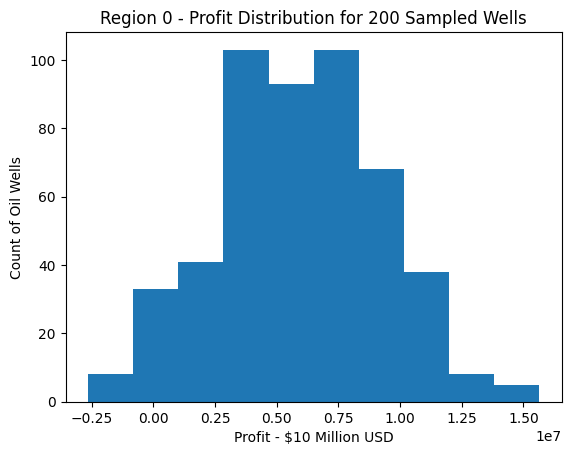

In [27]:
plt.hist(region0_values)
plt.title('Region 0 - Profit Distribution for 200 Sampled Wells')
plt.xlabel('Profit - $10 Million USD')
plt.ylabel('Count of Oil Wells')
plt.show()

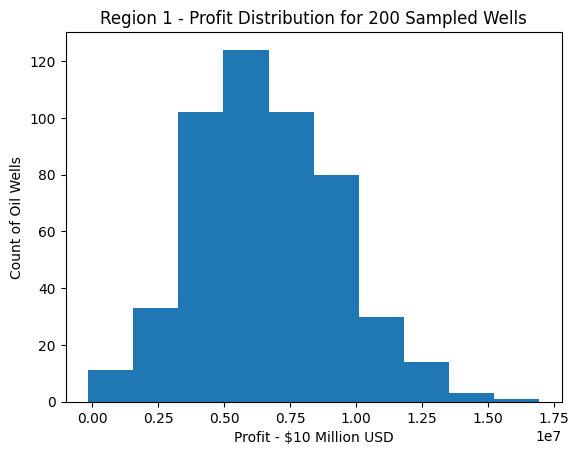

In [28]:
plt.hist(region1_values)
plt.title('Region 1 - Profit Distribution for 200 Sampled Wells')
plt.xlabel('Profit - $10 Million USD')
plt.ylabel('Count of Oil Wells')
plt.show()

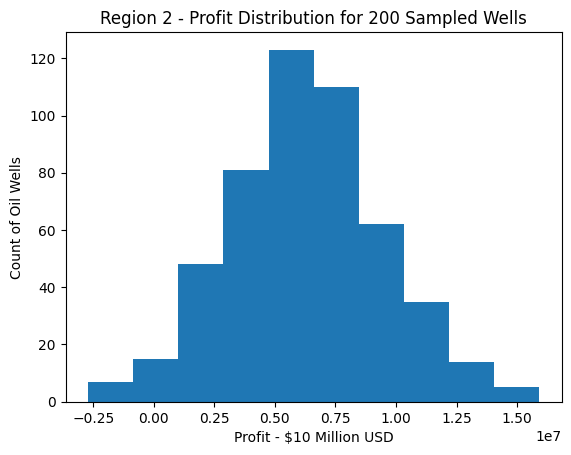

In [29]:
plt.hist(region2_values)
plt.title('Region 2 - Profit Distribution for 200 Sampled Wells')
plt.xlabel('Profit - $10 Million USD')
plt.ylabel('Count of Oil Wells')
plt.show()

In conclusion, I would justify that region 1 is the best region to build 200 wells on, because the risk of loss is the lowest of the 3 regions and the average profit is the highest of the 3 regions. While region 1 (68.7) has the lowest average predicted reserves compared to region 0 (92.6) and region 2 (94.9), region 1 has the least variance between each well. 

<div class="alert alert-success">
<b>Reviewer's comment</b>

Region choice makes sense, well done!

</div>